In [75]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [76]:
df = pd.read_csv("data/shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2429,2430,57,Male,Sneakers,Footwear,57,Virginia,XL,Maroon,Summer,4.40,No,Standard,No,No,47,Credit Card,Fortnightly
3072,3073,26,Female,Jewelry,Accessories,98,New York,L,Peach,Spring,3.10,No,Standard,No,No,46,PayPal,Quarterly
3391,3392,47,Female,Hoodie,Clothing,57,Montana,M,Silver,Fall,3.70,No,2-Day Shipping,No,No,6,Debit Card,Every 3 Months
2946,2947,38,Female,Pants,Clothing,77,Hawaii,L,Purple,Spring,2.80,No,Free Shipping,No,No,29,Bank Transfer,Quarterly
2131,2132,19,Male,Shorts,Clothing,52,Montana,M,Red,Fall,3.60,No,Express,No,No,9,Bank Transfer,Fortnightly


# 기초 분석

In [13]:
df.shape

(3900, 18)

In [14]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [15]:
df.info()
# null 값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [16]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [17]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,"3,900.00","3,900.00",3900,3900,3900,"3,900.00",3900,3900,3900,3900,"3,900.00",3900,3900,3900,3900,"3,900.00",3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,"1,950.50",44.07,NaN,NaN,NaN,59.76,NaN,NaN,NaN,NaN,3.75,NaN,NaN,NaN,NaN,25.35,NaN,NaN
std,"1,125.98",15.21,NaN,NaN,NaN,23.69,NaN,NaN,NaN,NaN,0.72,NaN,NaN,NaN,NaN,14.45,NaN,NaN
min,1.00,18.00,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,2.50,NaN,NaN,NaN,NaN,1.00,NaN,NaN
25%,975.75,31.00,NaN,NaN,NaN,39.00,NaN,NaN,NaN,NaN,3.10,NaN,NaN,NaN,NaN,13.00,NaN,NaN
50%,"1,950.50",44.00,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,25.00,NaN,NaN
75%,"2,925.25",57.00,NaN,NaN,NaN,81.00,NaN,NaN,NaN,NaN,4.40,NaN,NaN,NaN,NaN,38.00,NaN,NaN


In [18]:
# 데이터 unique 개수
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

# Gender(성별)에 관한 분석

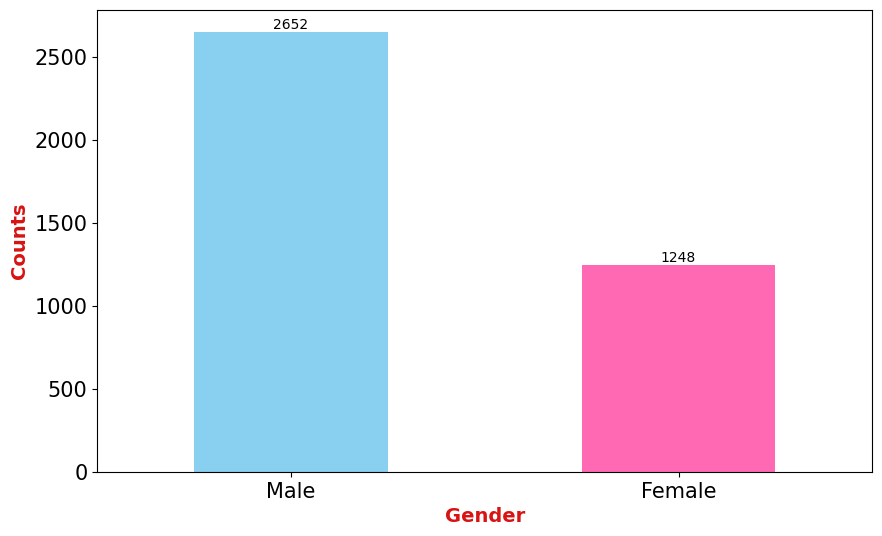

In [20]:
plt.figure(figsize = (10, 6))

ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
    
# Horizontal asymptote (HA) - It is a horizontal line and hence its equation is of the form y = k. 
# Vertical asymptote (VA) - It is a vertical line and hence its equation is of the form x = k
    
plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Counts', weight = "bold", color = "#D71313", fontsize = 14);

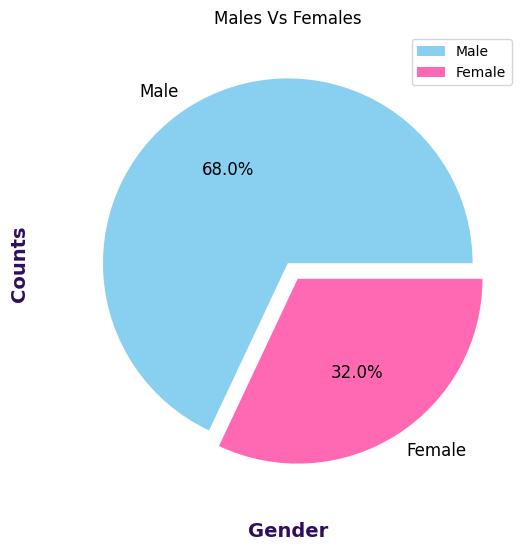

In [21]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

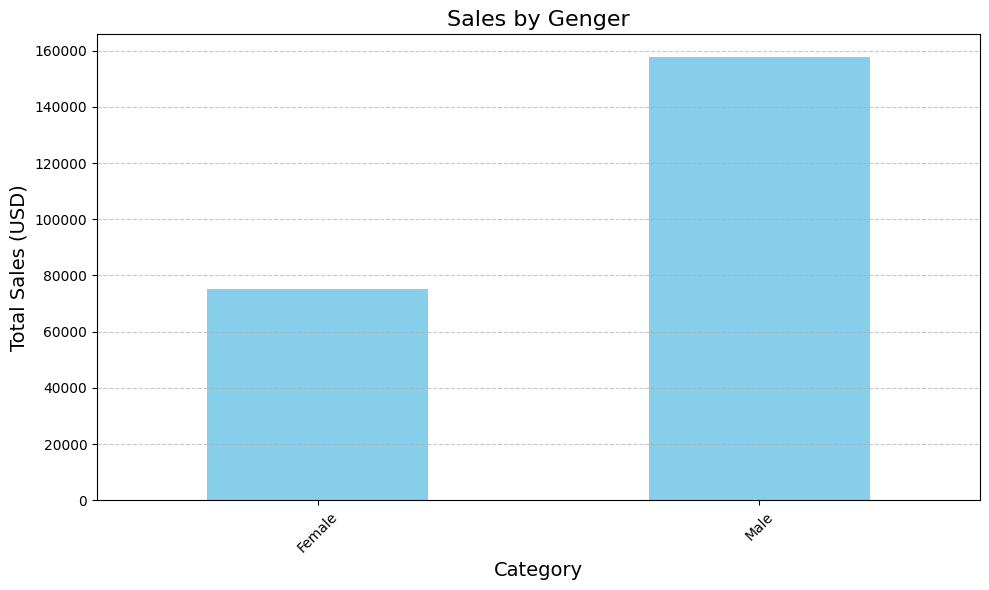

In [58]:
# 성별에 따른 매출액 계산
category_sales = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Genger', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
# 성별에 따른 별점
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


# Age(연령)에 대한 분석

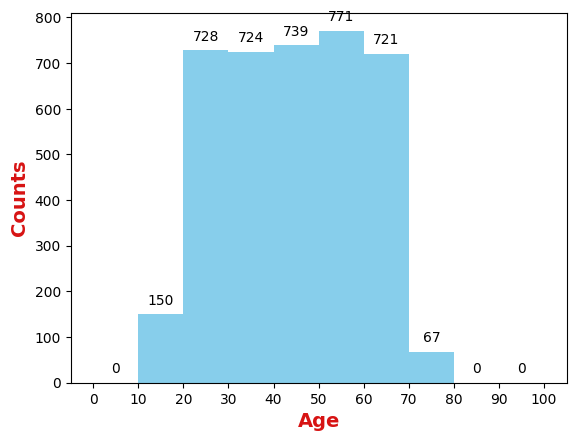

In [45]:
import matplotlib.pyplot as plt

# 히스토그램 생성
ax = df['Age'].plot(kind='hist', bins=range(0, 101, 10), color='skyblue')

# x축 눈금을 10년씩 세분화하여 설정
plt.xticks(range(0, 101, 10))

# 각 구간의 빈도수를 주석으로 추가
for i, bin in enumerate(ax.patches):
    x = bin.get_x() + bin.get_width() / 2
    y = bin.get_height()
    plt.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# 레이블 및 눈금 스타일 설정
plt.xlabel('Age', weight="bold", color="#D71313", fontsize=14)
plt.ylabel('Counts', weight="bold", color="#D71313", fontsize=14)

plt.show()


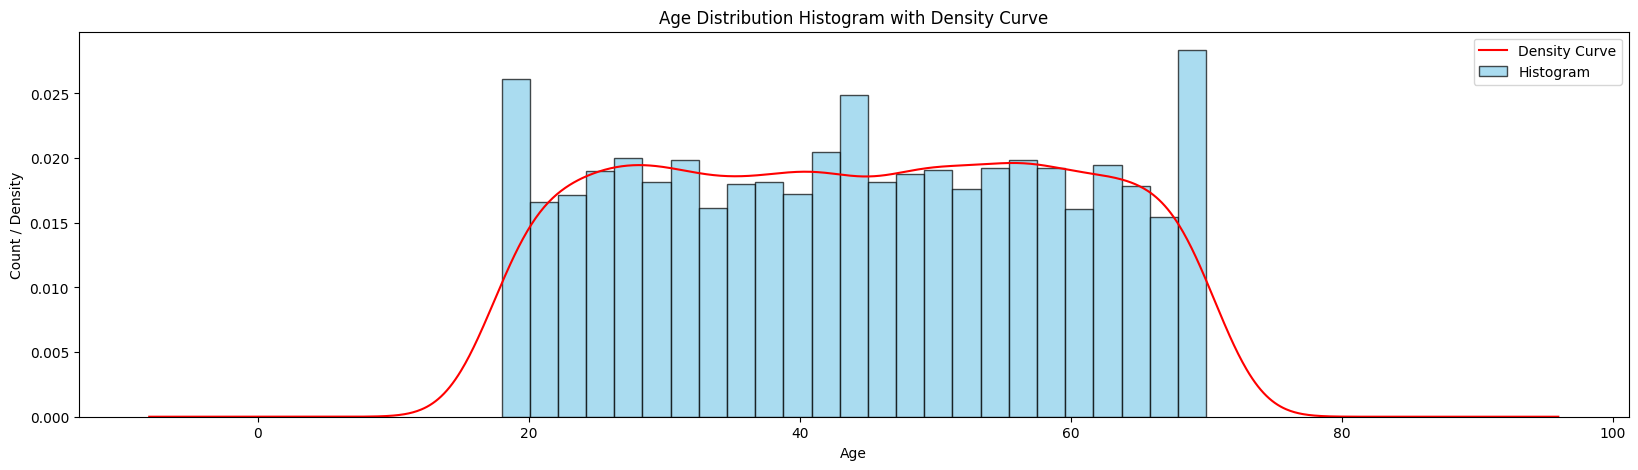

In [46]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

# Category(구매 품목)에 대한 분석

In [47]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

''

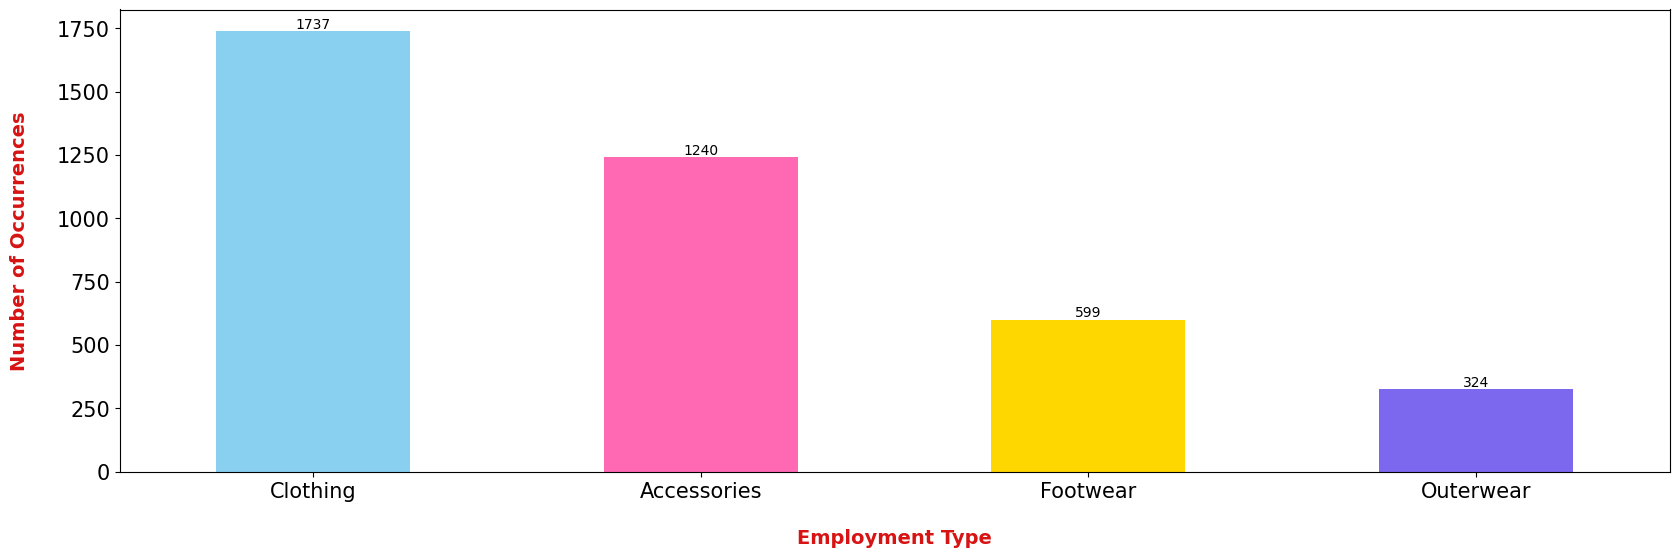

In [48]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);""

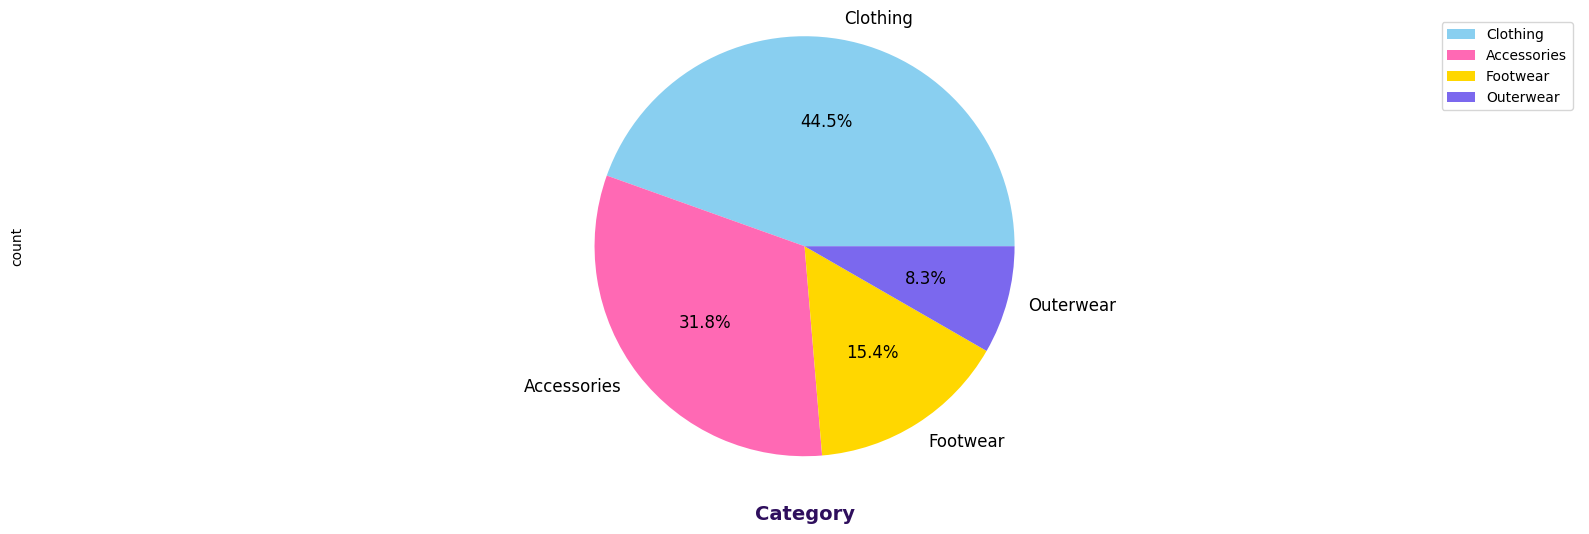

In [50]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Category', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

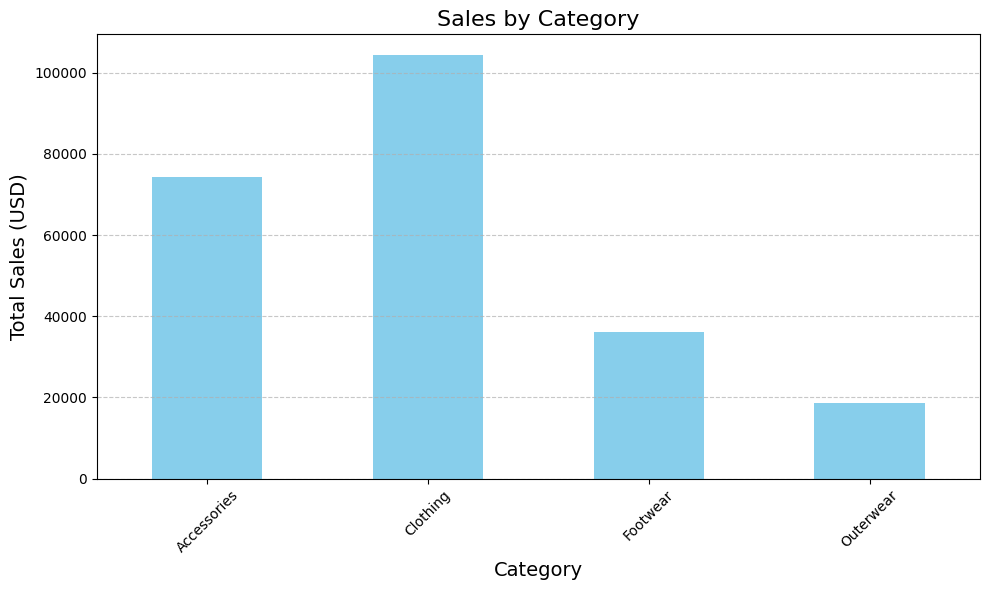

In [51]:
# 물품 (Category)별 매출액 계산
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum()

# 시각화
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales (USD)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Item Purchased(구매 품목 소분류)에 대한 분석

In [59]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

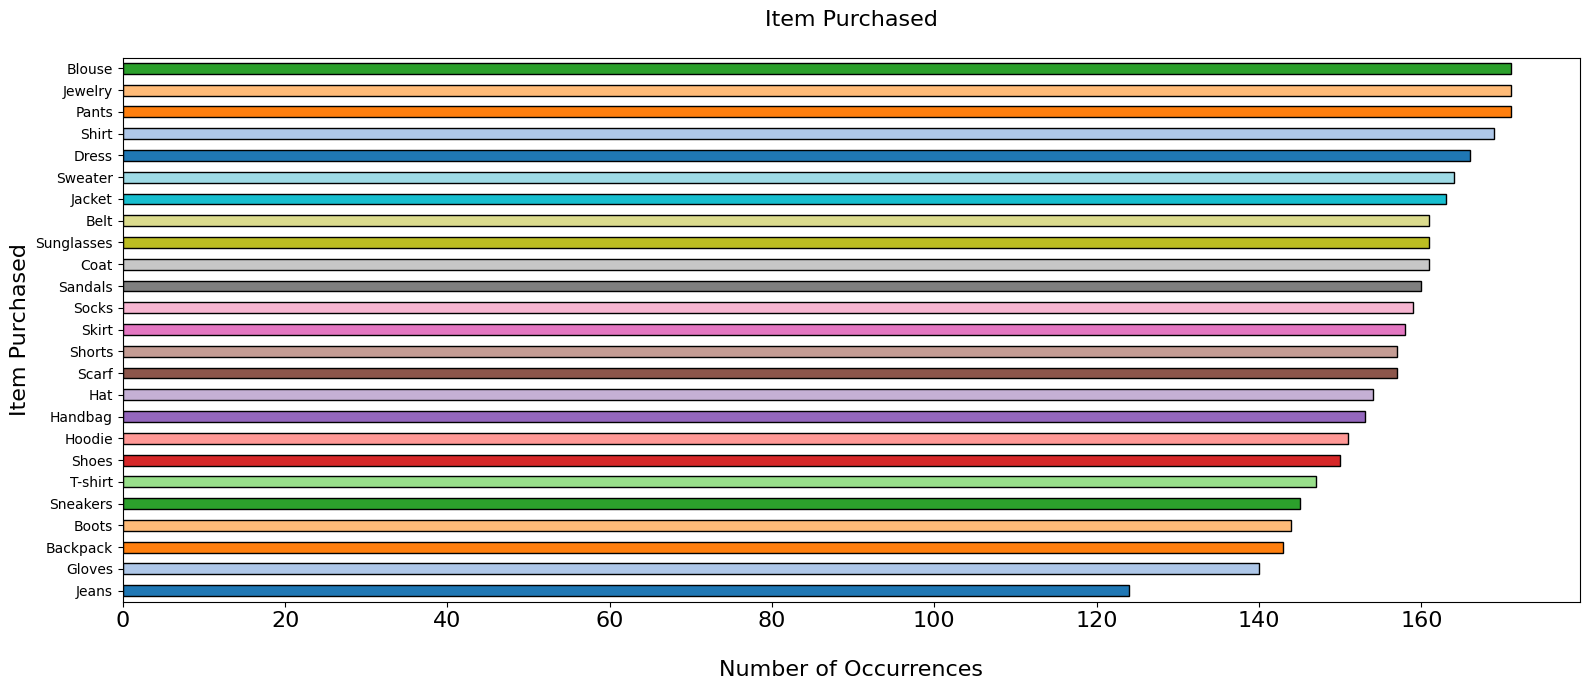

In [60]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# Location(구매 장소)에 대한 분석

In [61]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [79]:
# 각 지역의 계절에 따라 그룹화
spring_states = ['Alaska', 'Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania', 'Michigan', 'Minnesota', 'Wisconsin', 'Illinois', 'Iowa']
summer_states = ['Florida', 'Texas', 'California', 'Arizona', 'Nevada', 'Louisiana', 'Alabama', 'Mississippi', 'Georgia', 'South Carolina', 'North Carolina', 'Hawaii']
fall_states = ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Colorado', 'Utah', 'New Mexico', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Missouri', 'Arkansas', 'Louisiana', 'Wisconsin', 'Illinois', 'Iowa', 'Indiana', 'Ohio', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware']
winter_states = ['Alaska', 'Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Colorado', 'Utah', 'New Mexico', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Missouri', 'Arkansas', 'Iowa', 'Minnesota', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio', 'Kentucky', 'Tennessee', 'West Virginia', 'Virginia', 'Maryland', 'Delaware', 'Pennsylvania', 'New Jersey', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine']

# 새로운 컬럼 추가 및 계절 할당
df['state by season'] = 'Unknown'
df.loc[df['Location'].isin(spring_states), 'state by season'] = 'Spring'
df.loc[df['Location'].isin(summer_states), 'state by season'] = 'Summer'
df.loc[df['Location'].isin(fall_states), 'state by season'] = 'Fall'
df.loc[df['Location'].isin(winter_states), 'state by season'] = 'Winter'

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,state by season
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Winter
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Winter
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Winter
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Winter
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Winter


In [80]:
df["state by season"].value_counts()

state by season
Winter    2957
Fall       554
Summer     389
Name: count, dtype: int64

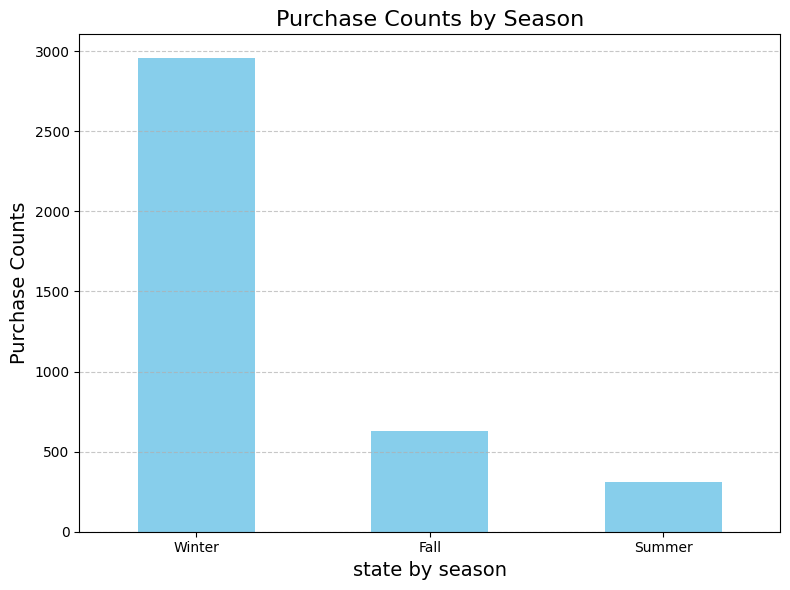

In [64]:
# 계절별 구매 빈도 계산
season_counts = df['state by season'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Purchase Counts by Season', fontsize=16)
plt.xlabel('state by season', fontsize=14)
plt.ylabel('Purchase Counts', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# size(사이즈)에 대한 분석

In [68]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

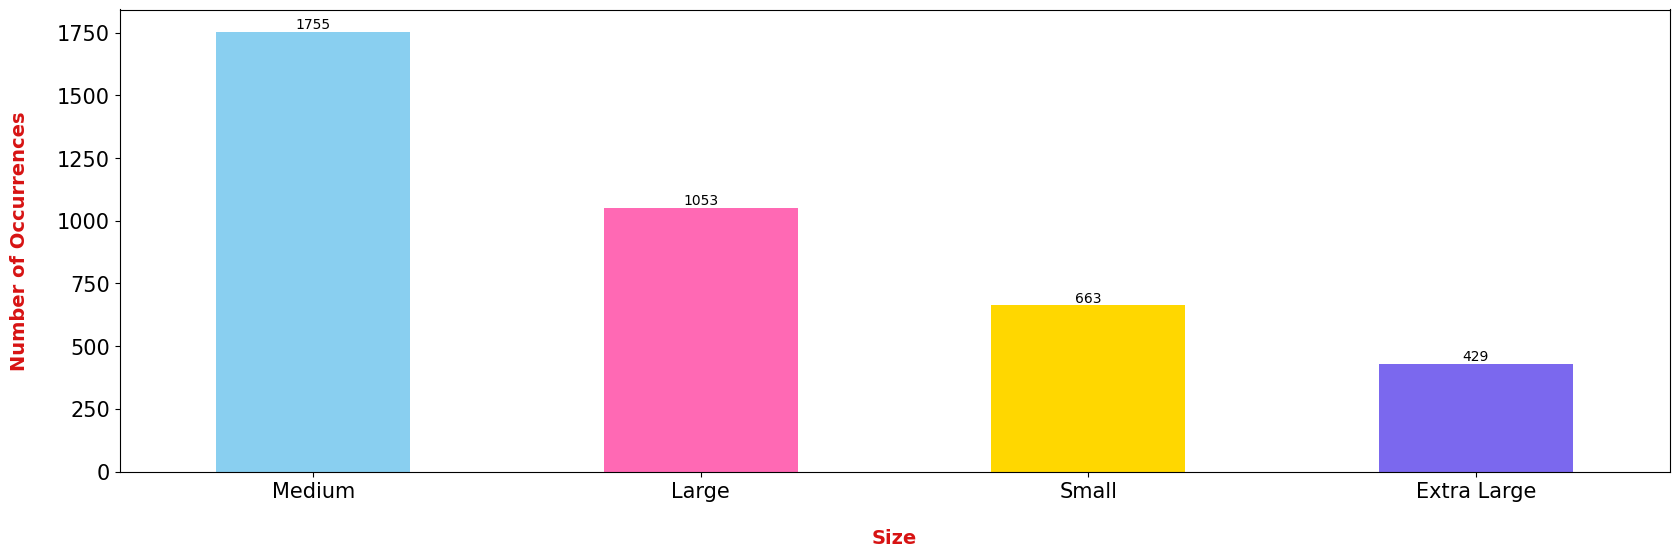

In [69]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

# color(옷 색)에 대한 분석

In [70]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

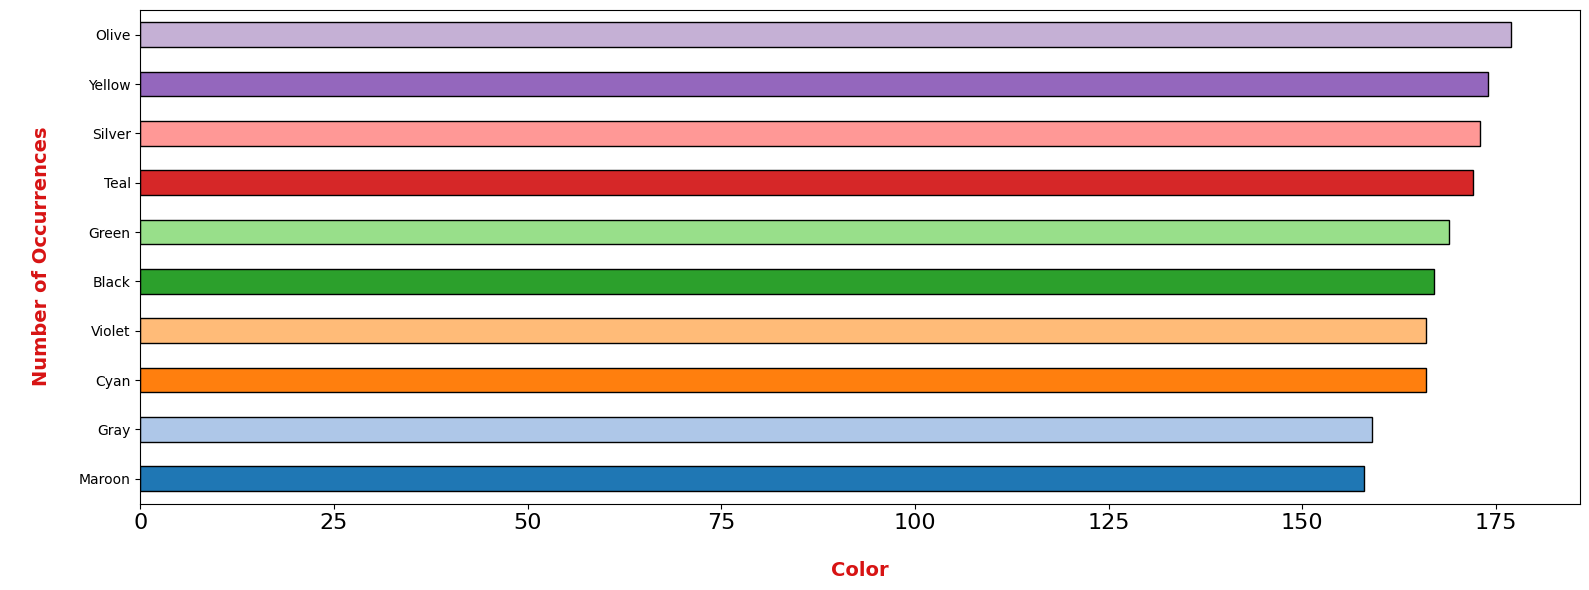

In [71]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

# season(계절)에 대한 분석

In [77]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

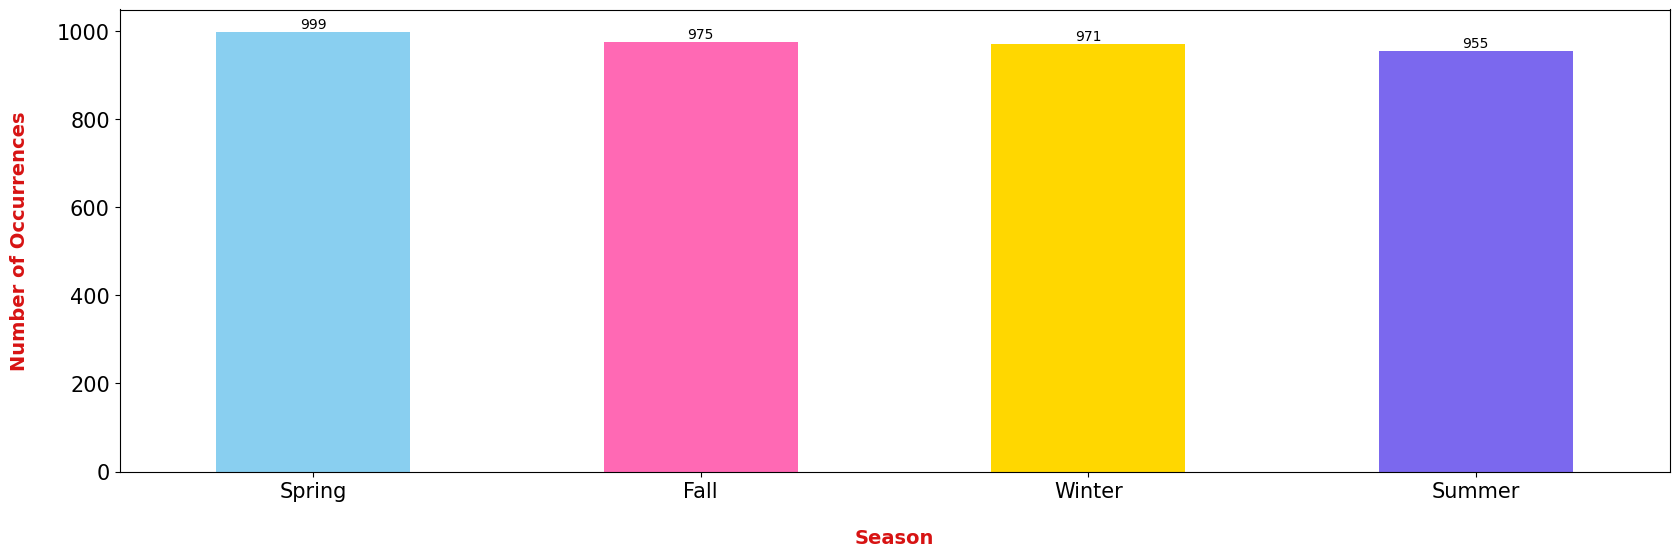

In [78]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

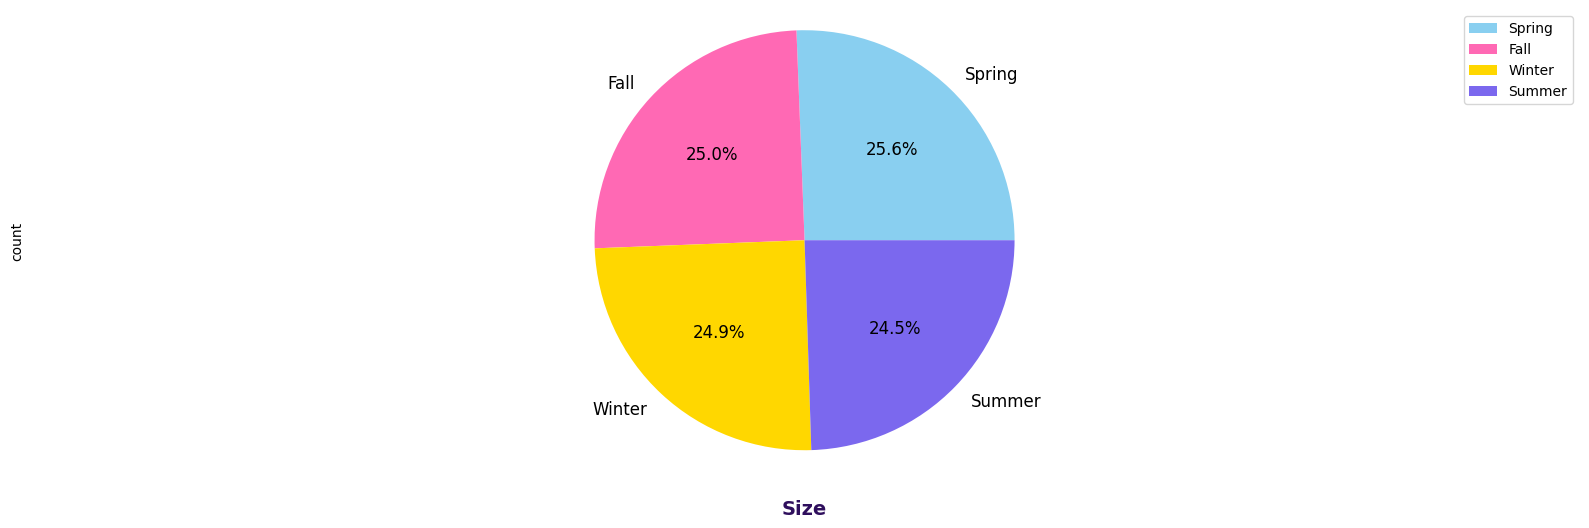

In [81]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Subscription Status(구독상태)에 대한 분석

In [82]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

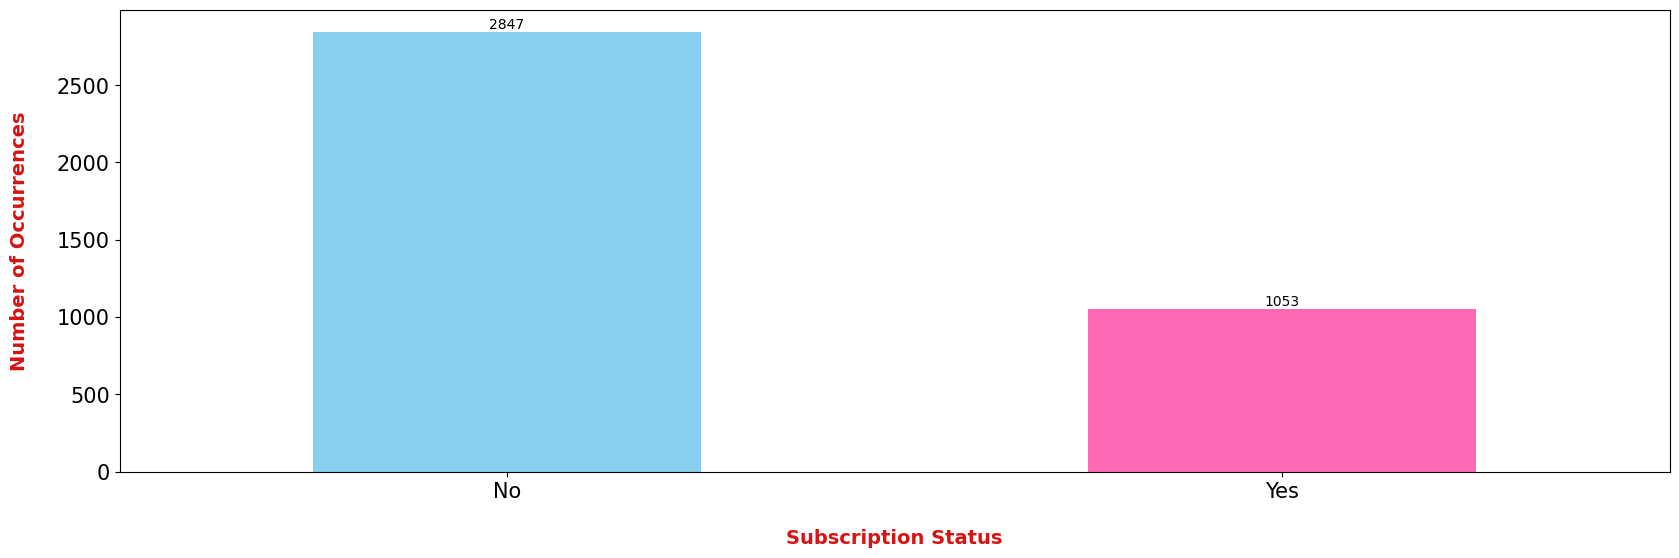

In [83]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

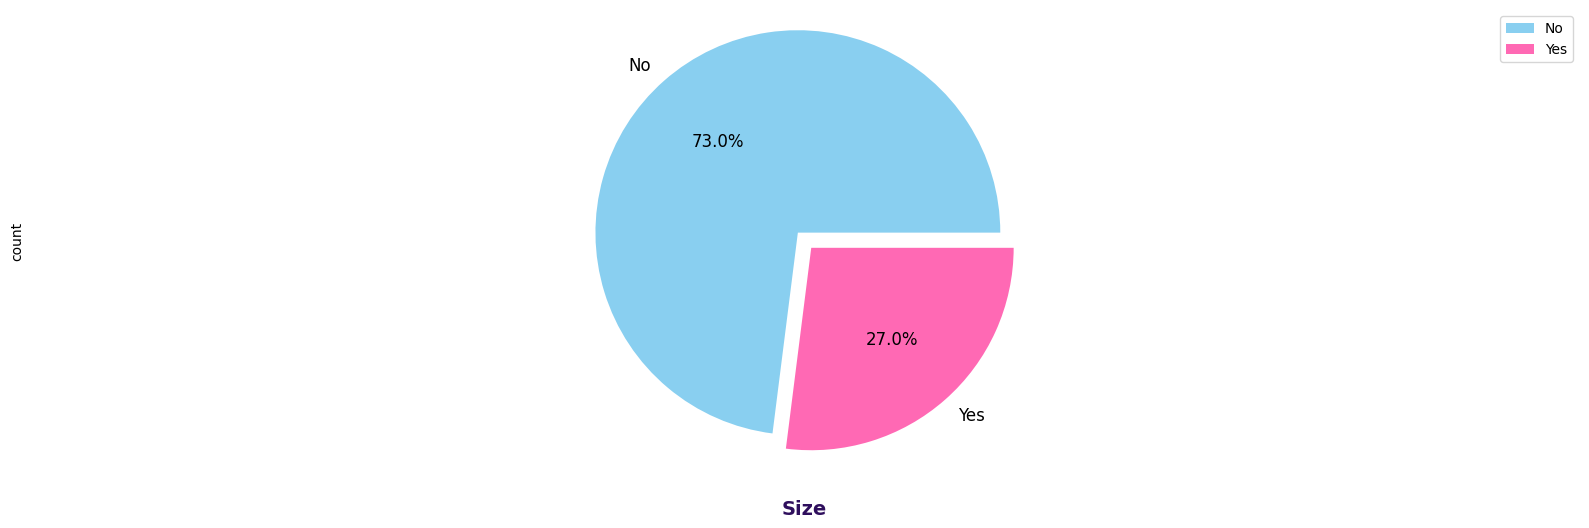

In [84]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Payment Method(지불방법)에 대한 분석

In [85]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

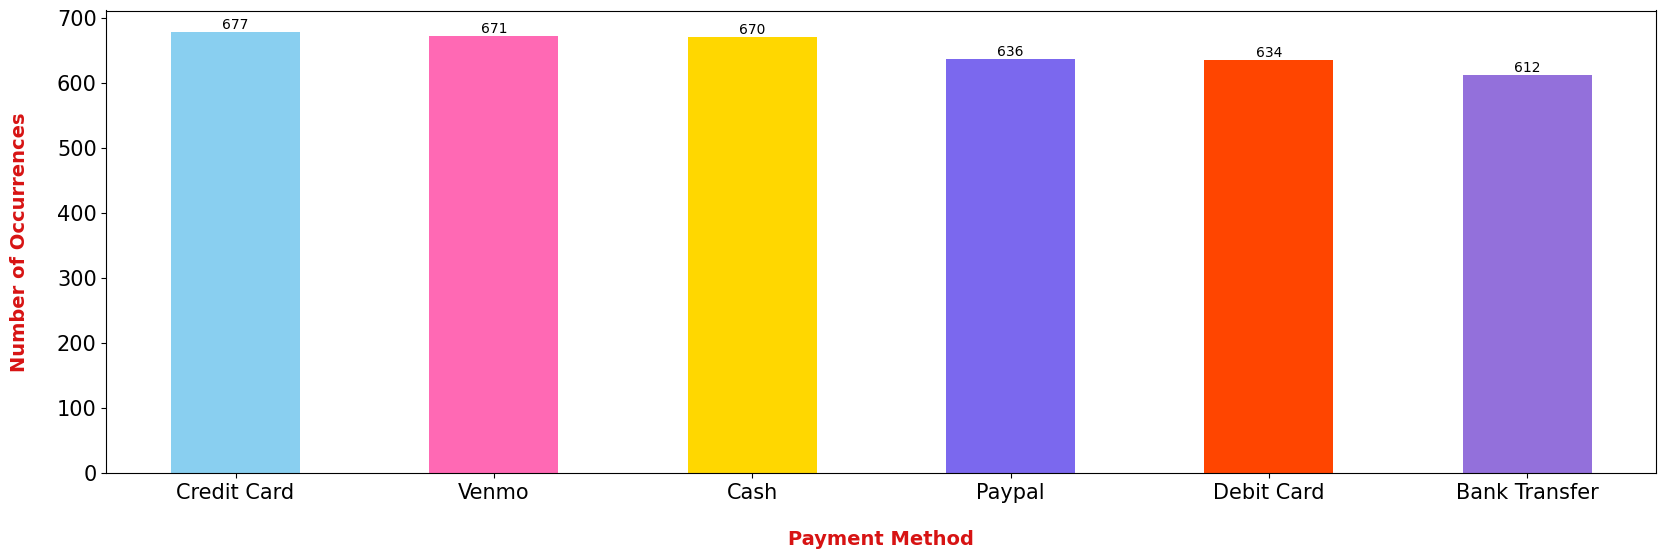

In [86]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

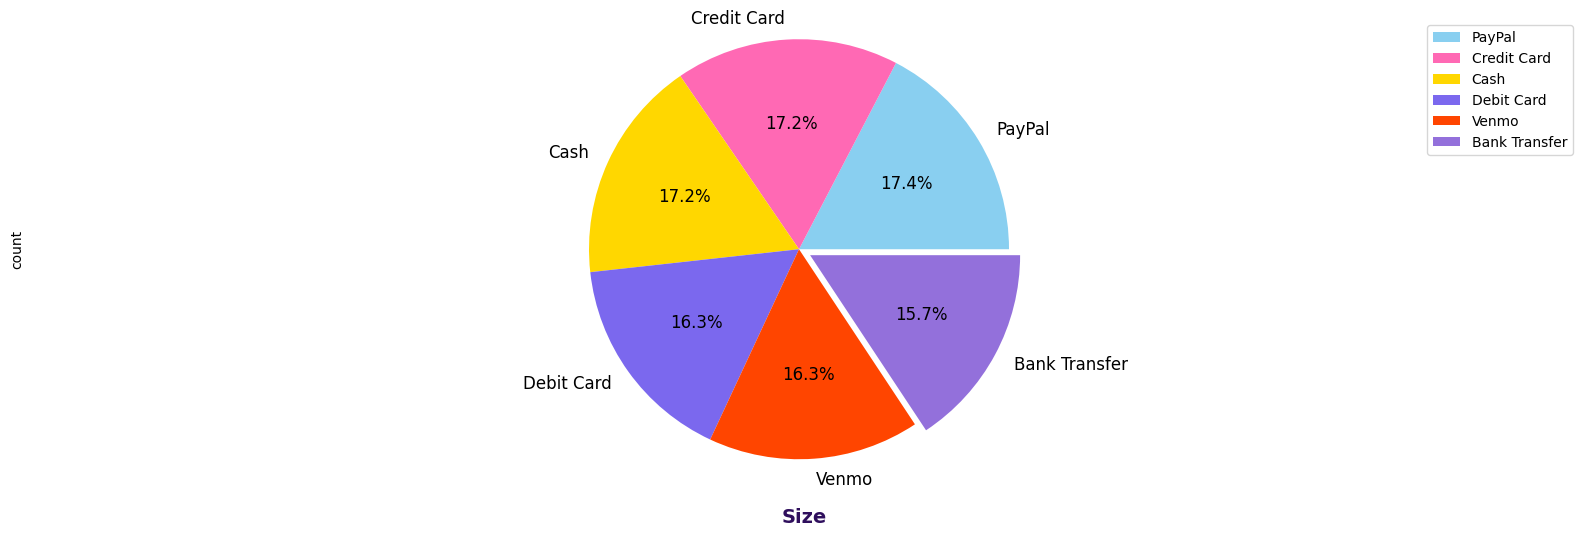

In [87]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Shipping Type(배송상태)에 대한 분석

In [88]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

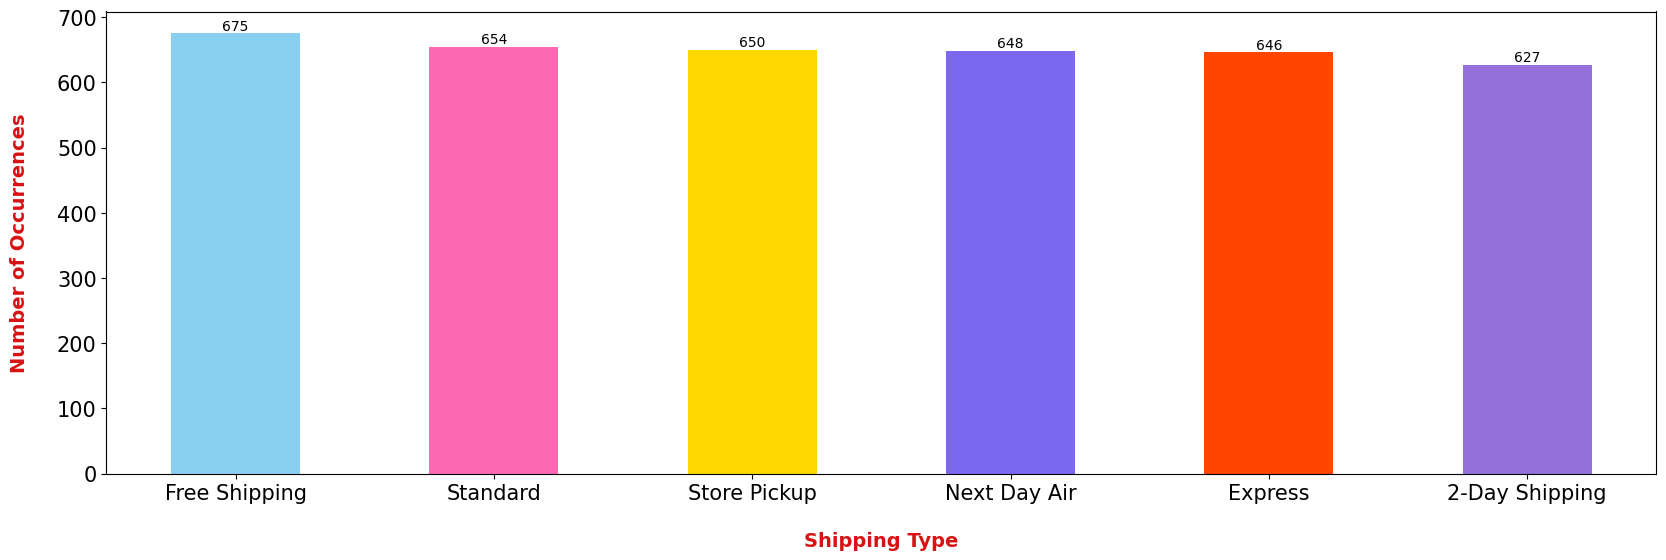

In [89]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

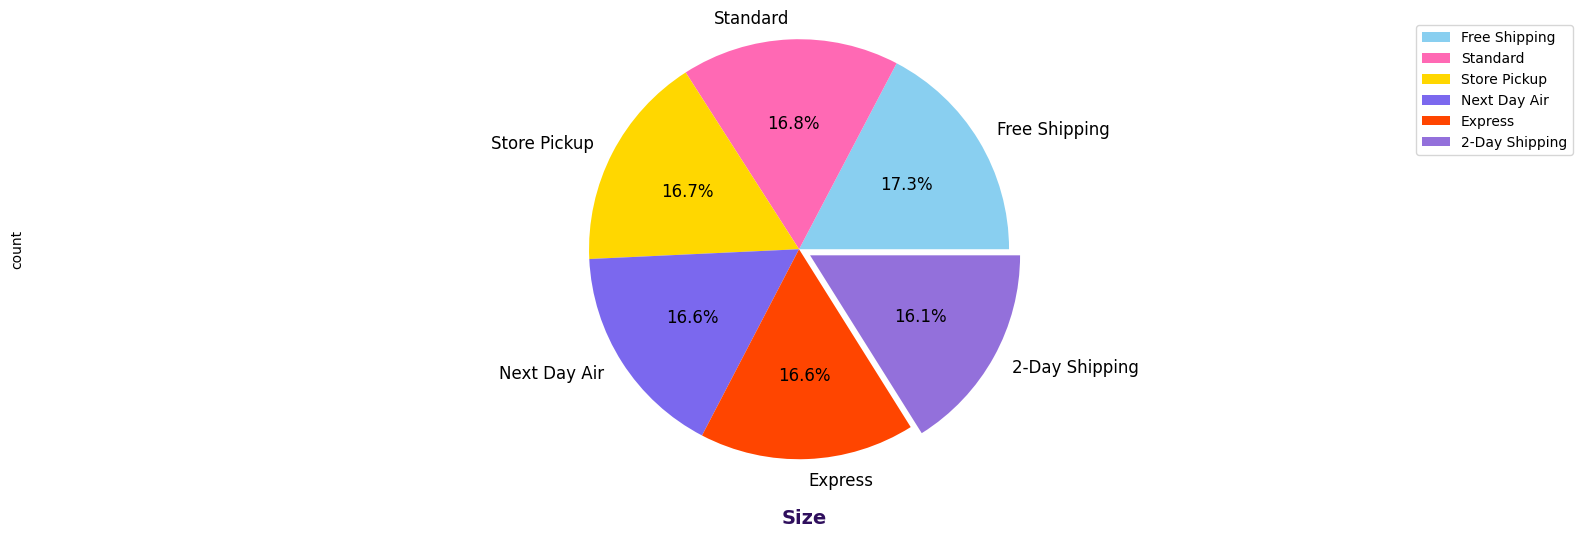

In [90]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

# Frequency of Purchases(구매 빈도)에 대한 분석

In [91]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

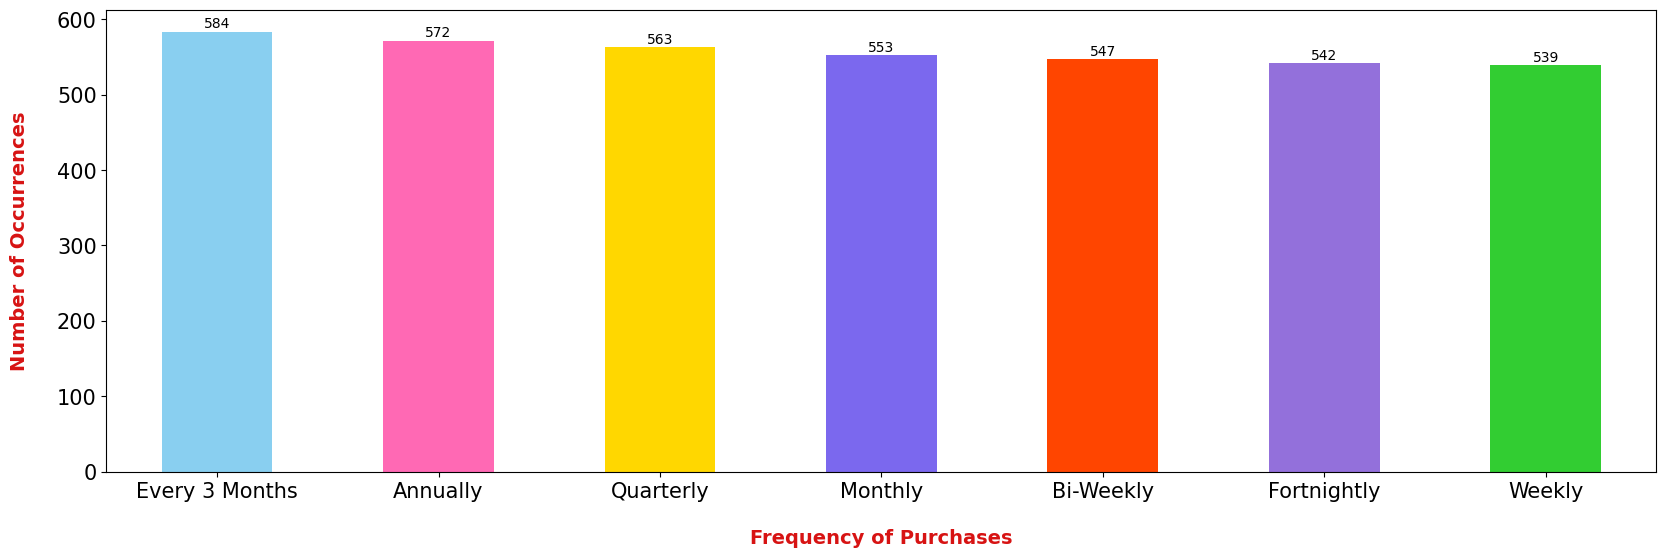

In [92]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

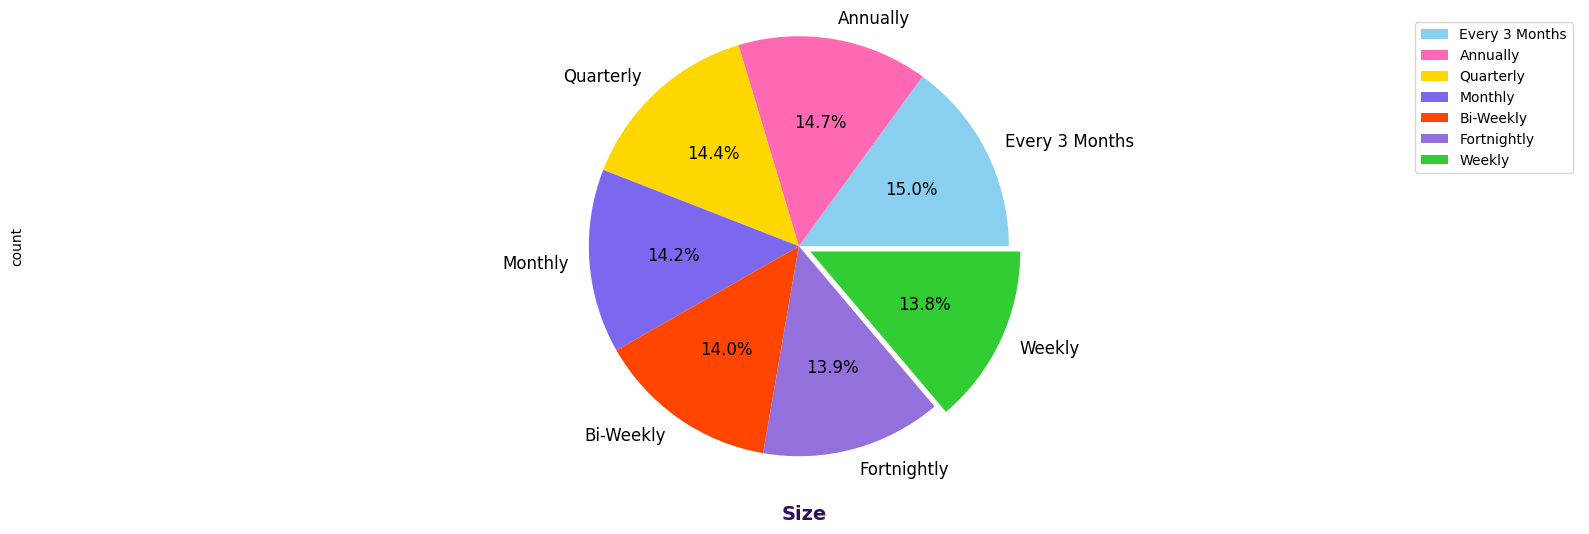

In [93]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

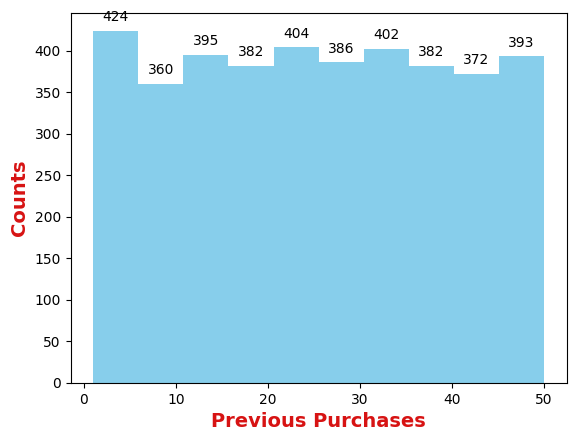

In [96]:
import matplotlib.pyplot as plt

# 히스토그램 생성
ax = df['Previous Purchases'].plot(kind='hist', color='skyblue')


# 각 구간의 빈도수를 주석으로 추가
for i, bin in enumerate(ax.patches):
    x = bin.get_x() + bin.get_width() / 2
    y = bin.get_height()
    plt.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# 레이블 및 눈금 스타일 설정
plt.xlabel('Previous Purchases', weight="bold", color="#D71313", fontsize=14)
plt.ylabel('Counts', weight="bold", color="#D71313", fontsize=14)

plt.show()


In [98]:
avg_purchase_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with more than 30 Previous Purchases:", avg_purchase_above_30_previous_purchases)

Average Purchase Amount for Customers with more than 30 Previous Purchases: 60.02840542285345
